## EOSC 453 - Assignment 1 
Claire Parrott, Vanessa Yau

Code Algorithim: 
1. import everything, initialize variables
2. find k values from steady state solution given initial flux conditions
3. use k values to plot timeseries when adding a source (emissions)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sci
from Functions import * ## this can be used to import all functions stored in a .py file
## ToDo: figure out how to use yaml files to 

Define some constants (global perhaps?). Inital values to be stored in a yaml file//outside the notebook

In [71]:
F12 = 90
F21 = 90
F15 = 110
F51 = 55
F57 = 55
F71 = 55 #detritus decomposition
F17 = F25 = F27 = F52 = F75 = F72 =  0

M0 = [725, 725, 110, 60] # 4 box model M0 values 
Flux_in = np.array([[0, F21, F51, F71], \
                    [F12, 0, F52, F72], \
                    [F15, F25, 0, F75],\
                    [F17, F27, F57, 0]])
Flux_out = np.array([[0, F12, F15, F17], \
                    [F21, 0, F25, F27], \
                    [F51, F52, 0, F57],\
                    [F71, F72, F75, 0]])
Mass_Flux_total = sum(Flux_in - Flux_out)
if sum(Mass_Flux_total) == 0:
    print('Net flux is 0')

# The timespan to integrate over
t_start = 1500; t_end= 2100; n = 100
t = np.linspace(t_start, t_end, n) # some time span


Net flux is 0


Thinking if we use the same code to plot everything we can keep it clean by creating functions to do this

c:\Users\clair\miniconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


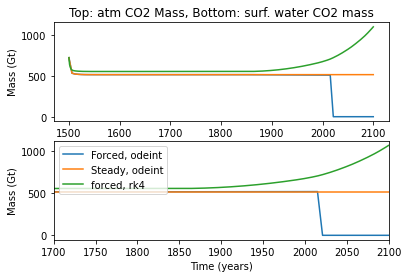

In [86]:
Mforced = sci.odeint(MassFlux_forced, M0, t, tfirst=True)
Msteady = sci.odeint(MassFlux_Steady, M0, t, tfirst=True)
[trk, Mrk] = rk4(MassFlux_forced, t_start, t_end, M0, 500) 
Mrk_real = np.real(Mrk) ## Take the real values only (I doubt there)
Mrk_im = np.imag(Mrk) 

plt.subplot(211)
plt.plot(t, Mforced[:, 0], label = 'Forced, odeint')
plt.plot(t, Msteady[:, 0], label = 'Steady, odeint')
plt.plot(trk, Mrk_real[:, 0], label = 'forced, rk4')
plt.title('Top: atm CO2 Mass, Bottom: surf. water CO2 mass')
plt.ylabel("Mass (Gt)")

plt.subplot(212)
plt.plot(t, Mforced[:, 1], label = 'Forced, odeint')
plt.plot(t, Msteady[:, 1], label = 'Steady, odeint')
plt.plot(trk, Mrk_real[:, 1], label = 'forced, rk4')
plt.xlabel("Time (years)")
plt.ylabel("Mass (Gt)")

plt.xlim([1700, 2100])
plt.legend(loc=2)
plt.show()

Check if the given flux values give a steady state (they do)

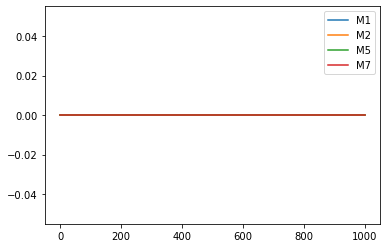

In [ ]:
MF = sci.odeint(FindK, F, t) ## flux vals already at steady state? use these to find k values.

plt.plot(t, MF[:, 0], label = 'M1')
plt.plot(t, MF[:, 1], label = 'M2')
plt.plot(t, MF[:, 2], label = 'M5')
plt.plot(t, MF[:, 3], label = 'M7')
plt.legend()